<a href="https://colab.research.google.com/github/ArmanKhan-git/Movie-Recommendation-System-FAISS-Index/blob/main/Movie_Recommendation_Large.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('TMDB_movie_dataset_v11.csv')
df_cred=pd.read_csv('credits.csv')


In [ ]:
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [ ]:
df_cred.head()

,imdb_id,director,cast
0,tt1375666,Christopher Nolan,"['Leonardo DiCaprio', 'Joseph Gordon-Levitt', ..."
1,tt0816692,Christopher Nolan,"['Matthew McConaughey', 'Anne Hathaway', 'Jess..."
2,tt0468569,Christopher Nolan,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh..."
3,tt0499549,James Cameron,"['Sam Worthington', 'Zoe Saldaña', 'Sigourney ..."
4,tt0848228,Joss Whedon,"['Robert Downey Jr.', 'Chris Evans', 'Scarlett..."


In [ ]:
df.shape

(1283169, 24)

In [ ]:
df_cred.shape

(28887, 3)

In [ ]:
df.isna().sum()

,0
id,0
title,15
vote_average,0
vote_count,0
status,0
release_date,251253
revenue,0
runtime,0
adult,0
backdrop_path,953762


In [ ]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')

In [ ]:
# id, title, overview, genres, vote_average, vote_count, popularity, production_countries
cols=[
    'imdb_id', 'title', 'overview', 'genres', 'vote_average', 'vote_count','popularity', 'production_countries','release_date','keywords','tagline'
]
df=df[cols]

In [ ]:
df.shape

(1283169, 11)

In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date']=df['release_date'].dt.year

<Axes: xlabel='release_date', ylabel='Count'>

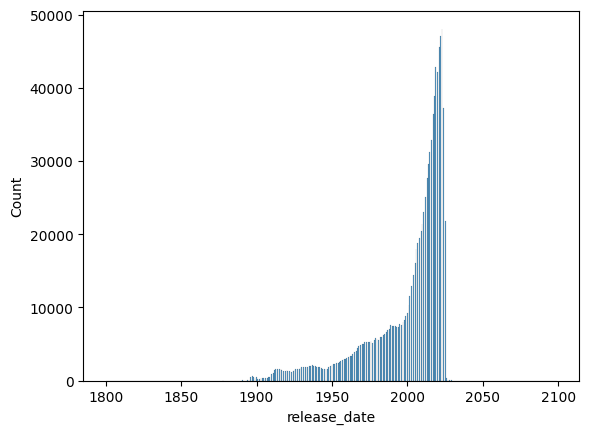

In [ ]:
sns.histplot(df['release_date'])

In [ ]:
df=df[(df['release_date']>=2000) & (df['release_date']<=2025)]

<Axes: xlabel='release_date', ylabel='Count'>

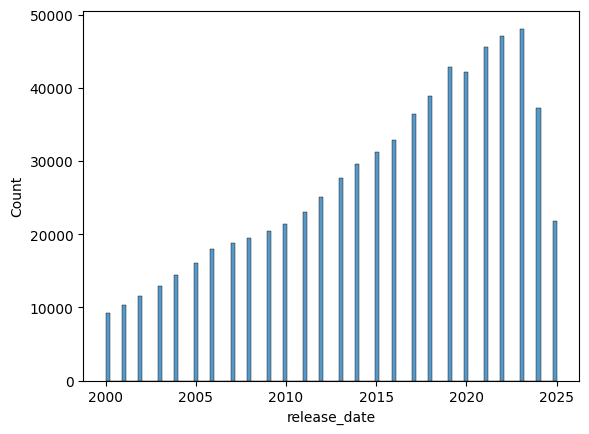

In [ ]:
sns.histplot(df['release_date'])

In [ ]:
def classify_industry(x):
    x = str(x)  # just in case
    if "United States of America" in x:
        return "Hollywood"
    elif "India" in x:
        return "Bollywood"
    elif "Unknown" in x:
        return "Unknown"
    else:
        return "Others"

df["Industry"] = df["production_countries"].apply(classify_industry)

print(df["Industry"].value_counts())

Industry
Others       565456
Hollywood    123359
Bollywood     13453
Name: count, dtype: int64


In [ ]:
df.head()

,imdb_id,title,overview,genres,vote_average,vote_count,popularity,production_countries,release_date,keywords,tagline,Industry
0,tt1375666,Inception,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure",8.364,34495,83.952,"United Kingdom, United States of America",2010.0,"rescue, mission, dream, airplane, paris, franc...",Your mind is the scene of the crime.,Hollywood
1,tt0816692,Interstellar,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction",8.417,32571,140.241,"United Kingdom, United States of America",2014.0,"rescue, future, spacecraft, race against time,...",Mankind was born on Earth. It was never meant ...,Hollywood
2,tt0468569,The Dark Knight,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller",8.512,30619,130.643,"United Kingdom, United States of America",2008.0,"joker, sadism, chaos, secret identity, crime f...",Welcome to a world without rules.,Hollywood
3,tt0499549,Avatar,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction",7.573,29815,79.932,"United States of America, United Kingdom",2009.0,"future, society, culture clash, space travel, ...",Enter the world of Pandora.,Hollywood
4,tt0848228,The Avengers,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure",7.710,29166,98.082,United States of America,2012.0,"new york city, superhero, shield, based on com...",Some assembly required.,Hollywood


In [ ]:
df.isna().sum()

,0
imdb_id,369330
title,4
overview,118594
genres,251857
vote_average,0
vote_count,0
popularity,0
production_countries,289694
release_date,0
keywords,492693


In [ ]:
df.dropna(subset=['imdb_id','title','tagline','production_countries'],inplace=True)

In [ ]:
df.isna().sum()

,0
imdb_id,0
title,0
overview,152
genres,3550
vote_average,0
vote_count,0
popularity,0
production_countries,0
release_date,0
keywords,17545


In [ ]:
#  changing na to "" in rest cols that have na
cols=['overview','genres','keywords']
df[cols]=df[cols].fillna('')

In [ ]:
df.isna().sum()

,0
imdb_id,0
title,0
overview,0
genres,0
vote_average,0
vote_count,0
popularity,0
production_countries,0
release_date,0
keywords,0


# Im gonna only stick to hollywood and bollywood cause the data is too much to handle

In [ ]:
df['Industry'].value_counts()

,count
Industry,
Hollywood,26827
Others,20974
Bollywood,2077


In [ ]:
df = df[df['Industry'].isin(['Hollywood', 'Bollywood'])].copy()
df.drop(columns=['tagline'],inplace=True)
df.head()

,imdb_id,title,overview,genres,vote_average,vote_count,popularity,production_countries,release_date,keywords,Industry
0,tt1375666,Inception,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure",8.364,34495,83.952,"United Kingdom, United States of America",2010.0,"rescue, mission, dream, airplane, paris, franc...",Hollywood
1,tt0816692,Interstellar,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction",8.417,32571,140.241,"United Kingdom, United States of America",2014.0,"rescue, future, spacecraft, race against time,...",Hollywood
2,tt0468569,The Dark Knight,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller",8.512,30619,130.643,"United Kingdom, United States of America",2008.0,"joker, sadism, chaos, secret identity, crime f...",Hollywood
3,tt0499549,Avatar,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction",7.573,29815,79.932,"United States of America, United Kingdom",2009.0,"future, society, culture clash, space travel, ...",Hollywood
4,tt0848228,The Avengers,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure",7.710,29166,98.082,United States of America,2012.0,"new york city, superhero, shield, based on com...",Hollywood


In [ ]:
df.shape

(28904, 11)

# Now lets get the df_cred data ready

In [ ]:
df_cred.head()

,imdb_id,director,cast
0,tt1375666,Christopher Nolan,"['Leonardo DiCaprio', 'Joseph Gordon-Levitt', ..."
1,tt0816692,Christopher Nolan,"['Matthew McConaughey', 'Anne Hathaway', 'Jess..."
2,tt0468569,Christopher Nolan,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh..."
3,tt0499549,James Cameron,"['Sam Worthington', 'Zoe Saldaña', 'Sigourney ..."
4,tt0848228,Joss Whedon,"['Robert Downey Jr.', 'Chris Evans', 'Scarlett..."


In [ ]:
df_cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28887 entries, 0 to 28886
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   imdb_id   28887 non-null  object
 1   director  28044 non-null  object
 2   cast      28887 non-null  object
dtypes: object(3)
memory usage: 677.2+ KB


In [ ]:
df_cred.isna().sum()

,0
imdb_id,0
director,843
cast,0


In [ ]:
df_cred['director']=df_cred['director'].fillna(value="")

In [ ]:
df_cred.isna().sum()


,0
imdb_id,0
director,0
cast,0


In [ ]:
df_cred['director']=df_cred['director'].apply(lambda x:x.split(","))


In [ ]:
df_cred.head()

,imdb_id,director,cast
0,tt1375666,[Christopher Nolan],"['Leonardo DiCaprio', 'Joseph Gordon-Levitt', ..."
1,tt0816692,[Christopher Nolan],"['Matthew McConaughey', 'Anne Hathaway', 'Jess..."
2,tt0468569,[Christopher Nolan],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh..."
3,tt0499549,[James Cameron],"['Sam Worthington', 'Zoe Saldaña', 'Sigourney ..."
4,tt0848228,[Joss Whedon],"['Robert Downey Jr.', 'Chris Evans', 'Scarlett..."


In [ ]:
# there are like co director also so i m gonna extract list[0] from director and then gonna remove whitespace between the name
df_cred['director']=df_cred['director'].apply(lambda x:x[0].strip())
import ast

# Convert string representation of list into actual Python list
df_cred['cast'] = df_cred['cast'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Now remove spaces inside names (Leonardo DiCaprio -> LeonardoDiCaprio)
df_cred['cast'] = df_cred['cast'].apply(lambda x: [name.replace(" ", "") for name in x])



In [ ]:
df_cred.head()

,imdb_id,director,cast
0,tt1375666,Christopher Nolan,"[LeonardoDiCaprio, JosephGordon-Levitt, Elliot..."
1,tt0816692,Christopher Nolan,"[MatthewMcConaughey, AnneHathaway, JessicaChas..."
2,tt0468569,Christopher Nolan,"[ChristianBale, HeathLedger, AaronEckhart]"
3,tt0499549,James Cameron,"[SamWorthington, ZoeSaldaña, SigourneyWeaver]"
4,tt0848228,Joss Whedon,"[RobertDowneyJr., ChrisEvans, ScarlettJohansson]"


# Now i need credits like director name and cast names so i have to scrap that from some api and we will us this df's imdb-id as reference for credits of each movie

In [ ]:
# import joblib
# joblib.dump(df, "movies.pkl")

# Merging df and df_cred with respect to imdb_id

In [ ]:
df=df.merge(df_cred,on=['imdb_id'])

In [ ]:
df.head()

,imdb_id,title,overview,genres,vote_average,vote_count,popularity,production_countries,release_date,keywords,Industry,director,cast
0,tt1375666,Inception,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure",8.364,34495,83.952,"United Kingdom, United States of America",2010.0,"rescue, mission, dream, airplane, paris, franc...",Hollywood,Christopher Nolan,"[LeonardoDiCaprio, JosephGordon-Levitt, Elliot..."
1,tt0816692,Interstellar,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction",8.417,32571,140.241,"United Kingdom, United States of America",2014.0,"rescue, future, spacecraft, race against time,...",Hollywood,Christopher Nolan,"[MatthewMcConaughey, AnneHathaway, JessicaChas..."
2,tt0468569,The Dark Knight,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller",8.512,30619,130.643,"United Kingdom, United States of America",2008.0,"joker, sadism, chaos, secret identity, crime f...",Hollywood,Christopher Nolan,"[ChristianBale, HeathLedger, AaronEckhart]"
3,tt0499549,Avatar,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction",7.573,29815,79.932,"United States of America, United Kingdom",2009.0,"future, society, culture clash, space travel, ...",Hollywood,James Cameron,"[SamWorthington, ZoeSaldaña, SigourneyWeaver]"
4,tt0848228,The Avengers,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure",7.710,29166,98.082,United States of America,2012.0,"new york city, superhero, shield, based on com...",Hollywood,Joss Whedon,"[RobertDowneyJr., ChrisEvans, ScarlettJohansson]"


# Weighted Rating Formula
# WR=v+mv​⋅R+v+mm​⋅C

In [ ]:
C = df['vote_average'].mean()
m_hollywood = df[df['Industry'] == 'Hollywood']['vote_count'].quantile(0.90)
m_bollywood = df[df['Industry'] == 'Bollywood']['vote_count'].quantile(0.70)
def weighted_rating(row, C=C, m_h=m_hollywood, m_b=m_bollywood):
    v = row['vote_count']
    R = row['vote_average']

    # Hollywood vs Bollywood threshold
    if row['Industry'] == 'Bollywood':
        m = m_b
    else:
        m = m_h

    # skip movies with too few votes
    if v < m:
        return np.nan

    return (v / (v + m)) * R + (m / (v + m)) * C
df['wr_score'] = df.apply(weighted_rating, axis=1)
qualified = df.dropna(subset=['wr_score'])

print("Qualified movies:", len(qualified))
print(qualified[['title', 'Industry', 'vote_average', 'vote_count', 'wr_score']].head(10))

Qualified movies: 3311
                                      title   Industry  vote_average  \
0                                 Inception  Hollywood         8.364   
1                              Interstellar  Hollywood         8.417   
2                           The Dark Knight  Hollywood         8.512   
3                                    Avatar  Hollywood         7.573   
4                              The Avengers  Hollywood         7.710   
5                                  Deadpool  Hollywood         7.606   
6                    Avengers: Infinity War  Hollywood         8.255   
7                   Guardians of the Galaxy  Hollywood         7.906   
8  Harry Potter and the Philosopher's Stone  Hollywood         7.916   
9                                  Iron Man  Hollywood         7.640   

   vote_count  wr_score  
0       34495  8.269805  
1       32571  8.316017  
2       30619  8.402151  
3       29815  7.486687  
4       29166  7.617885  
5       28894  7.516059  
6 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is your DataFrame and it has the 'wr_score' column
scaler = MinMaxScaler()
df['wr_norm_score'] = scaler.fit_transform(df[['wr_score']])

# Let's check the result
print(df[['title', 'wr_score', 'wr_norm_score']].head())

             title  wr_score  wr_norm_score
0        Inception  8.269805       0.973578
1     Interstellar  8.316017       0.982804
2  The Dark Knight  8.402151       1.000000
3           Avatar  7.486687       0.817232
4     The Avengers  7.617885       0.843425


In [ ]:
df.head()

,imdb_id,title,overview,genres,vote_average,vote_count,popularity,production_countries,release_date,keywords,Industry,director,cast,wr_score,wr_norm_score
0,tt1375666,Inception,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure",8.364,34495,83.952,"United Kingdom, United States of America",2010.0,"rescue, mission, dream, airplane, paris, franc...",Hollywood,Christopher Nolan,"[LeonardoDiCaprio, JosephGordon-Levitt, Elliot...",8.269805,0.973578
1,tt0816692,Interstellar,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction",8.417,32571,140.241,"United Kingdom, United States of America",2014.0,"rescue, future, spacecraft, race against time,...",Hollywood,Christopher Nolan,"[MatthewMcConaughey, AnneHathaway, JessicaChas...",8.316017,0.982804
2,tt0468569,The Dark Knight,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller",8.512,30619,130.643,"United Kingdom, United States of America",2008.0,"joker, sadism, chaos, secret identity, crime f...",Hollywood,Christopher Nolan,"[ChristianBale, HeathLedger, AaronEckhart]",8.402151,1.000000
3,tt0499549,Avatar,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction",7.573,29815,79.932,"United States of America, United Kingdom",2009.0,"future, society, culture clash, space travel, ...",Hollywood,James Cameron,"[SamWorthington, ZoeSaldaña, SigourneyWeaver]",7.486687,0.817232
4,tt0848228,The Avengers,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure",7.710,29166,98.082,United States of America,2012.0,"new york city, superhero, shield, based on com...",Hollywood,Joss Whedon,"[RobertDowneyJr., ChrisEvans, ScarlettJohansson]",7.617885,0.843425


In [ ]:
df['genres']=df['genres'].astype(str)
df['genres'] = df['genres'].apply(lambda x: [i.replace(" ", "") for i in x.split(",")])
df['overview']=df['overview'].astype(str)
df['keywords']=df['keywords'].astype(str)
df['overview']=df['overview'].apply(lambda x:x.split(","))
df['keywords']=df['keywords'].apply(lambda x:x.split(","))
df['director']=df['director'].apply(lambda x:x.split(","))



In [ ]:
df.head()

,imdb_id,title,overview,genres,vote_average,vote_count,popularity,production_countries,release_date,keywords,Industry,director,cast,wr_score,wr_norm_score
0,tt1375666,Inception,"[Cobb, a skilled thief who commits corporate ...","[Action, ScienceFiction, Adventure]",8.364,34495,83.952,"United Kingdom, United States of America",2010.0,"[rescue, mission, dream, airplane, paris, ...",Hollywood,[Christopher Nolan],"[LeonardoDiCaprio, JosephGordon-Levitt, Elliot...",8.269805,0.973578
1,tt0816692,Interstellar,[The adventures of a group of explorers who ma...,"[Adventure, Drama, ScienceFiction]",8.417,32571,140.241,"United Kingdom, United States of America",2014.0,"[rescue, future, spacecraft, race against t...",Hollywood,[Christopher Nolan],"[MatthewMcConaughey, AnneHathaway, JessicaChas...",8.316017,0.982804
2,tt0468569,The Dark Knight,[Batman raises the stakes in his war on crime....,"[Drama, Action, Crime, Thriller]",8.512,30619,130.643,"United Kingdom, United States of America",2008.0,"[joker, sadism, chaos, secret identity, cr...",Hollywood,[Christopher Nolan],"[ChristianBale, HeathLedger, AaronEckhart]",8.402151,1.000000
3,tt0499549,Avatar,"[In the 22nd century, a paraplegic Marine is ...","[Action, Adventure, Fantasy, ScienceFiction]",7.573,29815,79.932,"United States of America, United Kingdom",2009.0,"[future, society, culture clash, space trav...",Hollywood,[James Cameron],"[SamWorthington, ZoeSaldaña, SigourneyWeaver]",7.486687,0.817232
4,tt0848228,The Avengers,[When an unexpected enemy emerges and threaten...,"[ScienceFiction, Action, Adventure]",7.710,29166,98.082,United States of America,2012.0,"[new york city, superhero, shield, based on...",Hollywood,[Joss Whedon],"[RobertDowneyJr., ChrisEvans, ScarlettJohansson]",7.617885,0.843425


# Merging overview,genres, keywords, tagline into a one column for vectorization and cosine distance

In [ ]:
def join_list(x):
    if isinstance(x, list):
        return " ".join(x)
    return str(x)

cols = ['genres', 'keywords', 'overview', 'director','cast']
for col in cols:
    df[col] = df[col].apply(join_list)

# Now combine them
df['tags'] = (df['genres'] + " " +
                      df['keywords'] + " " +
                      df['overview'] + " " +
                      df['director']+ " " +
                      df['cast'])

In [ ]:
df.head()

,imdb_id,title,overview,genres,vote_average,vote_count,popularity,production_countries,release_date,keywords,Industry,director,cast,wr_score,wr_norm_score,tags
0,tt1375666,Inception,Cobb a skilled thief who commits corporate es...,Action ScienceFiction Adventure,8.364,34495,83.952,"United Kingdom, United States of America",2010.0,rescue mission dream airplane paris franc...,Hollywood,Christopher Nolan,LeonardoDiCaprio JosephGordon-Levitt ElliotPage,8.269805,0.973578,Action ScienceFiction Adventure rescue missio...
1,tt0816692,Interstellar,The adventures of a group of explorers who mak...,Adventure Drama ScienceFiction,8.417,32571,140.241,"United Kingdom, United States of America",2014.0,rescue future spacecraft race against time ...,Hollywood,Christopher Nolan,MatthewMcConaughey AnneHathaway JessicaChastain,8.316017,0.982804,Adventure Drama ScienceFiction rescue future ...
2,tt0468569,The Dark Knight,Batman raises the stakes in his war on crime. ...,Drama Action Crime Thriller,8.512,30619,130.643,"United Kingdom, United States of America",2008.0,joker sadism chaos secret identity crime f...,Hollywood,Christopher Nolan,ChristianBale HeathLedger AaronEckhart,8.402151,1.000000,Drama Action Crime Thriller joker sadism cha...
3,tt0499549,Avatar,In the 22nd century a paraplegic Marine is di...,Action Adventure Fantasy ScienceFiction,7.573,29815,79.932,"United States of America, United Kingdom",2009.0,future society culture clash space travel ...,Hollywood,James Cameron,SamWorthington ZoeSaldaña SigourneyWeaver,7.486687,0.817232,Action Adventure Fantasy ScienceFiction future...
4,tt0848228,The Avengers,When an unexpected enemy emerges and threatens...,ScienceFiction Action Adventure,7.710,29166,98.082,United States of America,2012.0,new york city superhero shield based on com...,Hollywood,Joss Whedon,RobertDowneyJr. ChrisEvans ScarlettJohansson,7.617885,0.843425,ScienceFiction Action Adventure new york city ...


# dropping the 'genres', 'keywords', 'overview', 'director','cast' cause they are not need now

In [ ]:
cols=['genres', 'keywords', 'overview', 'director','cast']
df=df.drop(columns=cols)

In [ ]:
df.head()

,imdb_id,title,vote_average,vote_count,popularity,production_countries,release_date,Industry,wr_score,wr_norm_score,tags
0,tt1375666,Inception,8.364,34495,83.952,"United Kingdom, United States of America",2010.0,Hollywood,8.269805,0.973578,Action ScienceFiction Adventure rescue missio...
1,tt0816692,Interstellar,8.417,32571,140.241,"United Kingdom, United States of America",2014.0,Hollywood,8.316017,0.982804,Adventure Drama ScienceFiction rescue future ...
2,tt0468569,The Dark Knight,8.512,30619,130.643,"United Kingdom, United States of America",2008.0,Hollywood,8.402151,1.000000,Drama Action Crime Thriller joker sadism cha...
3,tt0499549,Avatar,7.573,29815,79.932,"United States of America, United Kingdom",2009.0,Hollywood,7.486687,0.817232,Action Adventure Fantasy ScienceFiction future...
4,tt0848228,The Avengers,7.710,29166,98.082,United States of America,2012.0,Hollywood,7.617885,0.843425,ScienceFiction Action Adventure new york city ...


# Now preparing the tags column for vectorization and eventually apply TF-IDF

# 1) lowercasing the tags

In [ ]:
df['tags']=df['tags'].apply(lambda x:x.lower())

In [ ]:
df['tags']

,tags
0,action sciencefiction adventure rescue missio...
1,adventure drama sciencefiction rescue future ...
2,drama action crime thriller joker sadism cha...
3,action adventure fantasy sciencefiction future...
4,sciencefiction action adventure new york city ...
...,...
28899,drama crime a story of a man trying to save a...
28900,interracial sex big dick this hardcore inter...
28901,anal sex double penetration interracial sex...
28902,comedy tang a short film about the absurdities...


# 2) APplying stemming

In [ ]:
import nltk
from nltk.stem.porter import PorterStemmer

ps=PorterStemmer()


In [ ]:
def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [ ]:
df['tags']=df['tags'].apply(stem)
print(df['tags'].head(20))

0     action sciencefict adventur rescu mission drea...
1     adventur drama sciencefict rescu futur spacecr...
2     drama action crime thriller joker sadism chao ...
3     action adventur fantasi sciencefict futur soci...
4     sciencefict action adventur new york citi supe...
5     action adventur comedi superhero anti hero mer...
6     adventur action sciencefict sacrific magic sup...
7     action sciencefict adventur spacecraft base on...
8     adventur fantasi witch school friend friendshi...
9     action sciencefict adventur middl east superhe...
10    drama western rescu friendship bounti hunter t...
11    adventur sciencefict action superhero time tra...
12    crime thriller drama dream street gang societi...
13    adventur fantasi action base on novel or book ...
14    adventur fantasi action base on novel or book ...
15    drama thriller mysteri island base on novel or...
16    crime drama comedi corrupt drug addict anti he...
17    action adventur sciencefict artifici intel

# Applying vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
vectors = vectorizer.fit_transform(df['tags'])

In [ ]:
print(vectorizer.get_feature_names_out())


['000' '10' '100' ... 'zombies' 'zone' 'zoo']


# cosine distance not working so lets go with FAISS

In [ ]:
!pip install faiss-cpu



In [ ]:
import faiss
import numpy as np

# Convert sparse TF-IDF to dense
vectors_dense = vectors.toarray().astype('float32')  # (n_movies x n_features)


In [ ]:
faiss.normalize_L2(vectors_dense)


In [ ]:
d = vectors_dense.shape[1]  # feature dimension
index = faiss.IndexFlatIP(d)  # Inner Product = cosine similarity (if normalized)
index.add(vectors_dense)      # Add all movie vectors to the index


In [ ]:
# (Assuming 'df' is your DataFrame with an 'industry' column)

# Create a dictionary to hold the indices for each industry
industry_indices = {
    'Hollywood': df[df['Industry'] == 'Hollywood'].index.to_numpy(dtype='int64'),
    'Bollywood': df[df['Industry'] == 'Bollywood'].index.to_numpy(dtype='int64')
}

print(f"Found {len(industry_indices['Hollywood'])} Hollywood movies.")
print(f"Found {len(industry_indices['Bollywood'])} Bollywood movies.")

Found 26827 Hollywood movies.
Found 2077 Bollywood movies.


In [ ]:
# First, make sure the main recommendation function is defined
def recommend_faiss_hybrid_filtered(movie_title, k=5, alpha=0.5, industry='All'):
    """
    (This is the powerful helper function from before)
    Recommends movies using a hybrid score and an industry filter.
    """
    # --- 1. PREPARATION & INPUT VALIDATION ---
    try:
        movie_idx = df[df['title'] == movie_title].index[0]
    except IndexError:
        return f"Movie '{movie_title}' not found in the dataset."

    if industry not in ['Hollywood', 'Bollywood', 'All']:
        return f"Invalid industry specified. Please choose 'Hollywood', 'Bollywood', or 'All'."

    # --- 2. CANDIDATE GENERATION WITH FILTERING ---
    num_candidates = k * 5
    search_params = faiss.SearchParameters()
    if industry != 'All':
        ids_to_search = industry_indices.get(industry)
        if ids_to_search is None or len(ids_to_search) == 0:
            return [] # Return an empty list if no movies in that industry
        selector = faiss.IDSelectorArray(ids_to_search)
        search_params.sel = selector

    query_vector = vectors_dense[movie_idx:movie_idx+1]
    D, I = index.search(query_vector, num_candidates, params=search_params)

    # --- 3. RE-RANKING ---
    candidates = []
    for i, sim_score in zip(I[0], D[0]):
        if i == -1 or i == movie_idx:
            continue
        wr_norm = df.iloc[i]['wr_norm_score']
        hybrid_score = (alpha * sim_score) + ((1 - alpha) * wr_norm)
        candidates.append({'title': df.iloc[i].title, 'hybrid_score': hybrid_score})

    candidates.sort(key=lambda x: x['hybrid_score'], reverse=True)
    return candidates[:k]


# --- NOW, THE NEW FUNCTION YOU ASKED FOR ---

def get_recommendations_by_industry(movie_title, k=5, alpha=0.6):
    """
    Gets top k recommendations for a movie, split by Hollywood and Bollywood.

    Args:
        movie_title (str): The movie to get recommendations for.
        k (int): The number of recommendations per industry.
        alpha (float): The weight for the similarity score.
    """
    print(f"--- Generating recommendations based on '{movie_title}' ---")

    # --- Get Hollywood Recommendations ---
    hollywood_recs = recommend_faiss_hybrid_filtered(
        movie_title=movie_title, k=k, alpha=alpha, industry='Hollywood'
    )

    # --- Get Bollywood Recommendations ---
    bollywood_recs = recommend_faiss_hybrid_filtered(
        movie_title=movie_title, k=k, alpha=alpha, industry='Bollywood'
    )

    # --- Display in the requested format ---
    print(f"\nTop {k} recommended Hollywood movies:")
    if hollywood_recs and isinstance(hollywood_recs, list):
        for i, rec in enumerate(hollywood_recs, 1):
            print(f"{i}. {rec['title']}")
    else:
        print("No Hollywood recommendations found.")

    print(f"\nTop {k} recommended Bollywood movies:")
    if bollywood_recs and isinstance(bollywood_recs, list):
        for i, rec in enumerate(bollywood_recs, 1):
            print(f"{i}. {rec['title']}")
    else:
        print("No Bollywood recommendations found.")

# --- Example Usage ---
# Now you can call this single function
get_recommendations_by_industry("The Conjuring", k=5, alpha=0.8)

print("\n======================================================\n")



--- Generating recommendations based on 'The Conjuring' ---

Top 5 recommended Hollywood movies:
1. The Conjuring: The Devil Made Me Do It
2. The Conjuring 2
3. The Sleepless Unrest
4. American Ghost Hunter
5. 8ight After

Top 5 recommended Bollywood movies:
1. Vikram
2. Ezra
3. Amanuda Bhayam
4. Talaash
5. Demon




In [ ]:
import joblib
joblib.dump(df,"moives.pkl")
joblib.dump(vectors_dense,"vectors.pkl")
joblib.dump(industry_indices,"industry_indices.pkl")
faiss.write_index(index, 'faiss_index.index')

